In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import zscore

In [14]:
data = pd.read_csv('supplier.csv')
data

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse_mi,Delay
0,Nigeria,EXW,Air,2008-05-02,2008-02-05,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,0.01,India,22.351115,78.667743,9.600036,7.999972,6306,-87
1,Haiti,EXW,Air,2008-02-18,2008-02-18,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,0.44,India,22.351115,78.667743,19.139995,-72.357097,6831,0
2,Guyana,EXW,Air,2008-09-04,2008-04-01,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,0.00,India,22.351115,78.667743,4.841710,-58.641689,6831,-156
3,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,5328,0
4,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,1.39,France,46.603354,1.888334,-28.816624,24.991639,5407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6997,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6998,Rwanda,N/A - From RDC,Air,2012-08-06,2012-06-01,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,11.96,India,22.351115,78.667743,-1.964663,30.064436,3714,-66
6999,Uganda,N/A - From RDC,Truck,2012-06-12,2012-11-20,SCMS from RDC,25,169.00,6.76,0.11,Yes,0.24,India,22.351115,78.667743,1.533355,32.216658,3714,161


In [15]:
features = data.select_dtypes(include=[np.number]).drop(columns=['Manufacturing_Country_Lat', 'Manufacturing_Country_Lon',
                                                                  'Warehouse_Country_Lat', 'Warehouse_Country_Lon','Distance_to_Warehouse_mi'])
features

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
0,650,6.50,0.01,0.00,0.01,-87
1,2,278.00,139.00,1.39,0.44,0
2,240,2.40,0.01,0.00,0.00,-156
3,6,405.06,67.51,0.25,0.65,0
4,600,870.00,1.45,0.01,1.39,0
...,...,...,...,...,...,...
6996,23,53.59,2.33,0.04,0.08,0
6997,23,53.59,2.33,0.04,0.08,0
6998,1004,8534.00,8.50,0.04,11.96,-66
6999,25,169.00,6.76,0.11,0.24,161


In [16]:
df = pd.DataFrame(data, columns=['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'LineItemInsurance','Delay'])


In [17]:
df_clean = df[(np.abs(zscore(df)) < 3).all(axis=1)]
df_clean

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
0,650,6.50,0.01,0.00,0.01,-87
2,240,2.40,0.01,0.00,0.00,-156
3,6,405.06,67.51,0.25,0.65,0
4,600,870.00,1.45,0.01,1.39,0
5,5498,54.98,0.01,0.00,0.09,-65
...,...,...,...,...,...,...
6996,23,53.59,2.33,0.04,0.08,0
6997,23,53.59,2.33,0.04,0.08,0
6998,1004,8534.00,8.50,0.04,11.96,-66
6999,25,169.00,6.76,0.11,0.24,161


In [18]:
def rename_shipment_mode(mode):
    if mode in ['Air', 'Air Charter']:
        return 'Air_All'
    elif mode in ['Truck', 'Ocean']:
        return 'Ground_Sea'
    else:
        return mode  
data['Shipment Mode'] = data['Shipment Mode'].apply(rename_shipment_mode)

print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW       Air_All              2008-05-02   
1         Haiti              EXW       Air_All              2008-02-18   
2        Guyana              EXW       Air_All              2008-09-04   
3  South Africa              DDP    Ground_Sea              2008-04-24   
4  South Africa              DDP    Ground_Sea              2008-04-24   

  Delivered to Client Date                Vendor  Line Item Quantity  \
0               2008-02-05         Orgenics, Ltd                 650   
1               2008-02-18  Trinity Biotech, Plc                   2   
2               2008-04-01         Orgenics, Ltd                 240   
3               2008-04-24    S. BUYS WHOLESALER                   6   
4               2008-04-24    S. BUYS WHOLESALER                 600   

   Line Item Value  Pack Price  Unit Price First Line Designation  \
0             6.50        0.01        0.00           

In [19]:
X = df_clean
print(X.head())

   Line Item Quantity  Line Item Value  Pack Price  Unit Price  \
0                 650             6.50        0.01        0.00   
2                 240             2.40        0.01        0.00   
3                   6           405.06       67.51        0.25   
4                 600           870.00        1.45        0.01   
5                5498            54.98        0.01        0.00   

   LineItemInsurance  Delay  
0               0.01    -87  
2               0.00   -156  
3               0.65      0  
4               1.39      0  
5               0.09    -65  


In [20]:
X_copy = X.copy()
X_copy.dropna(inplace=True)
X_copy

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
0,650,6.50,0.01,0.00,0.01,-87
2,240,2.40,0.01,0.00,0.00,-156
3,6,405.06,67.51,0.25,0.65,0
4,600,870.00,1.45,0.01,1.39,0
5,5498,54.98,0.01,0.00,0.09,-65
...,...,...,...,...,...,...
6996,23,53.59,2.33,0.04,0.08,0
6997,23,53.59,2.33,0.04,0.08,0
6998,1004,8534.00,8.50,0.04,11.96,-66
6999,25,169.00,6.76,0.11,0.24,161


In [21]:
features = df_clean
target = data.loc[df_clean.index, 'Shipment Mode']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Gaussian Naive Bayes model: {accuracy}')

Accuracy of Gaussian Naive Bayes model: 0.6597222222222222


Confusion Matrix:
 [[756  96]
 [345  99]]
Classification Report:
              precision    recall  f1-score   support

     Air_All       0.69      0.89      0.77       852
  Ground_Sea       0.51      0.22      0.31       444

    accuracy                           0.66      1296
   macro avg       0.60      0.56      0.54      1296
weighted avg       0.63      0.66      0.62      1296



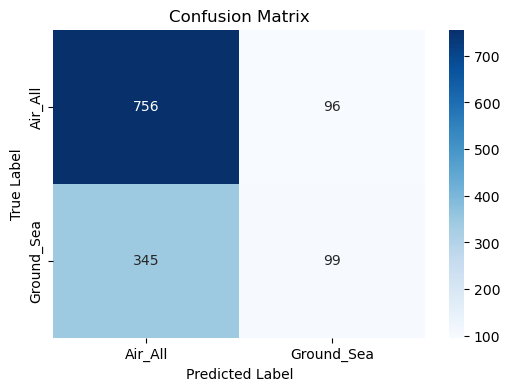

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


cm = confusion_matrix(y_test, y_pred)
class_labels = ['Air_All', 'Ground_Sea']
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [50]:
train_indices = set(X_train.index)
test_indices = set(X_test.index)
overlap = train_indices & test_indices  # This should be an empty set
print("Overlap between training and testing set indices:", overlap)

Overlap between training and testing set indices: set()


In [51]:
print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())


Sample of training data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
3261,68072,653491.20,9.60,0.32,671.79,-76
6523,121,9075.00,75.00,0.62,12.72,0
311,30,1970.40,65.68,0.24,3.86,-24
6843,25,0.25,0.01,0.00,0.00,0
465,119,394.64,3.32,0.11,0.49,0



Sample of testing data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
2207,168,221.76,1.32,0.02,0.37,-21
2539,12,1199.88,99.99,1.00,2.35,0
3342,20000,185600.00,9.28,0.04,306.24,0
369,27,742.84,27.51,0.23,0.76,0
5930,378,33642.00,89.00,0.89,55.51,175


In [52]:
print("\nSample of training data:")
display(y_train.head())

print("\nSample of testing data:")
display(y_test.head())


Sample of training data:


3261       Air_All
6523       Air_All
311     Ground_Sea
6843       Air_All
465     Ground_Sea
Name: Shipment Mode, dtype: object


Sample of testing data:


2207       Air_All
2539       Air_All
3342    Ground_Sea
369     Ground_Sea
5930       Air_All
Name: Shipment Mode, dtype: object

In [53]:
combined_data = pd.concat([X, target], axis=1)
combined_data.to_csv('gaussiannaivebayes.csv', index=False)